c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


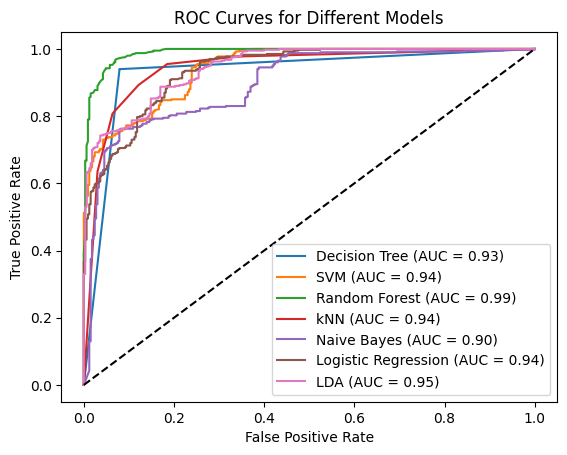

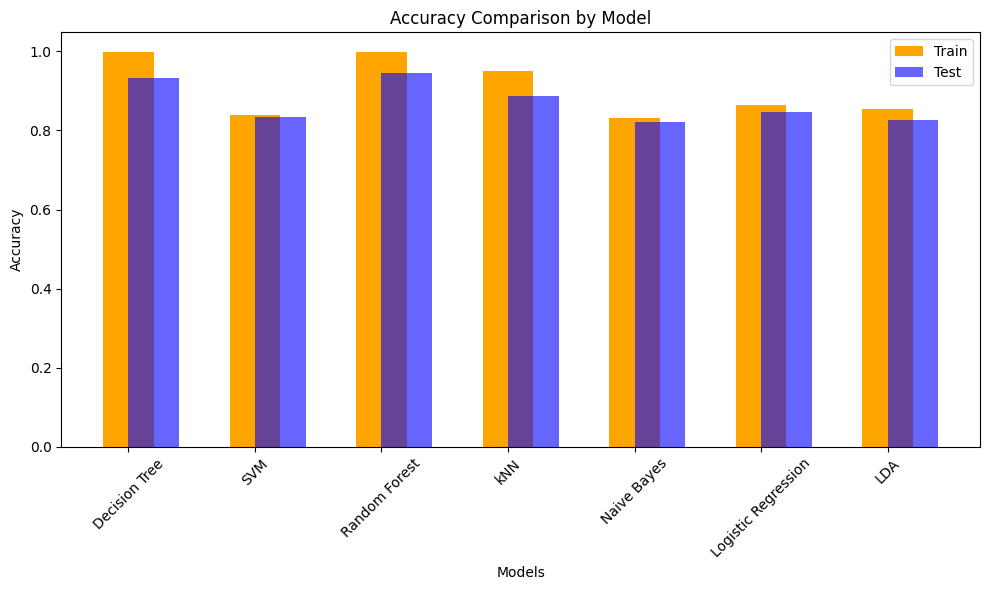

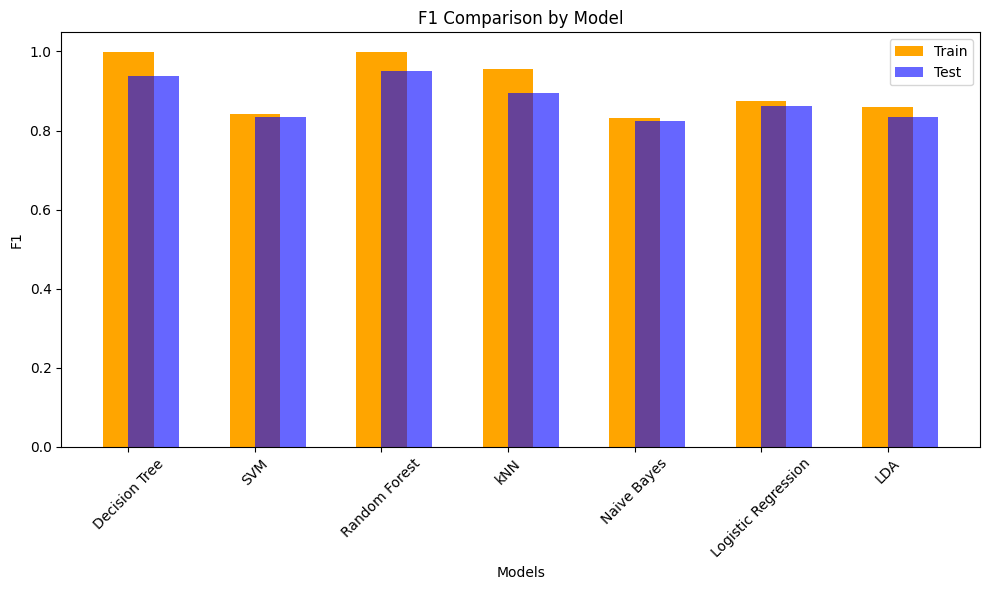

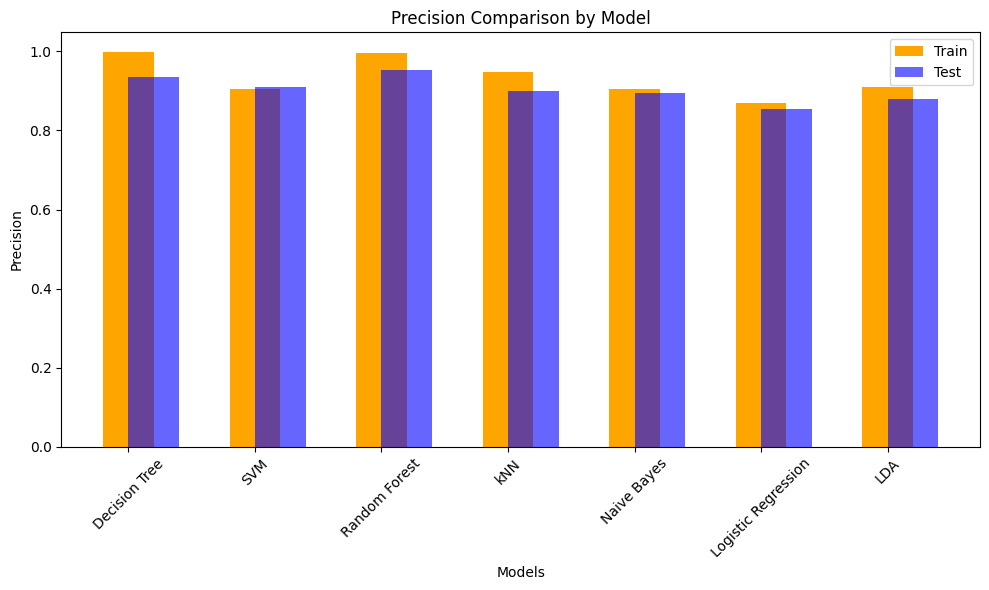

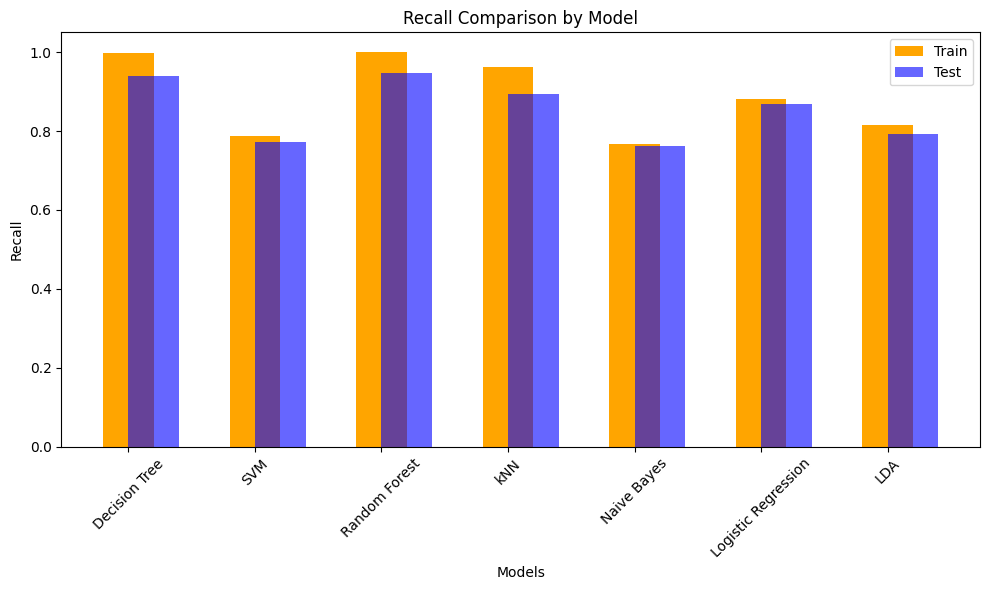

                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1  \
0        Decision Tree        0.998286       0.931507  0.998420  0.937656   
1                  SVM        0.839616       0.832877  0.841892  0.835135   
2        Random Forest        0.998286       0.945205  0.998422  0.949875   
3                  kNN        0.951337       0.886301  0.955486  0.895859   
4          Naive Bayes        0.830363       0.820548  0.830769  0.823212   
5  Logistic Regression        0.863948       0.846575  0.875196  0.861042   
6                  LDA        0.855038       0.827397  0.858953  0.834211   

   Train Precision  Test Precision  Train Recall  Test Recall   ROC AUC  
0         0.998105        0.935323      0.998736       0.9400  0.930318  
1         0.904209        0.908824      0.787611       0.7725  0.942458  
2         0.996849        0.952261      1.000000       0.9475  0.989174  
3         0.947761        0.899244      0.963338       0.8925  0.943822  
4         0.9

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
df = pd.read_csv('data_to_model.csv')

# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert to NumPy array if not already
X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10),
    "LDA": LinearDiscriminantAnalysis()
}

# Store metrics
metrics = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1": [],
    "Test F1": [],
    "Train Precision": [],
    "Test Precision": [],
    "Train Recall": [],
    "Test Recall": [],
    "ROC AUC": []
}

# Function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    return train_acc, test_acc, train_f1, test_f1, train_precision, test_precision, train_recall, test_recall, roc_auc, fpr, tpr

# Evaluate models and store metrics
for name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    metrics["Model"].append(name)
    metrics["Train Accuracy"].append(results[0])
    metrics["Test Accuracy"].append(results[1])
    metrics["Train F1"].append(results[2])
    metrics["Test F1"].append(results[3])
    metrics["Train Precision"].append(results[4])
    metrics["Test Precision"].append(results[5])
    metrics["Train Recall"].append(results[6])
    metrics["Test Recall"].append(results[7])
    metrics["ROC AUC"].append(results[8])

    # Plot ROC Curve for each model
    plt.plot(results[9], results[10], label=f'{name} (AUC = {results[8]:.2f})')

# Plotting ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

# Plotting bar charts
metrics_df = pd.DataFrame(metrics)
for metric in ["Accuracy", "F1", "Precision", "Recall"]:
    plt.figure(figsize=(10, 6))
    # Plotting training metrics
    plt.bar(metrics_df["Model"], metrics_df[f"Train {metric}"], color='orange', width=0.4, label='Train', align='center')
    # Plotting testing metrics
    plt.bar(metrics_df["Model"], metrics_df[f"Test {metric}"], color='blue', width=0.4, label='Test', alpha=0.6, align='edge')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison by Model')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Print metrics
print(metrics_df)

# Save metrics to a CSV file
metrics_df.to_csv('model_performance_metrics.csv', index=False)


In [6]:
from joblib import dump

# Locate the trained Random Forest model
rf_model = models["Random Forest"].fit(X_train, y_train)

# Save the model to disk
model_filename = 'saved_model.joblib'
dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to saved_model.joblib
